### Organize imports

In [1]:
from gensim.models import Word2Vec
from lib.amazon_model import *
from lib.data_mgmt import *
from nltk.data import find
from sklearn.metrics import roc_curve, auc

import gensim
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

from sklearn.manifold import TSNE

### Set network parameters

In [2]:
# Dataset/Featurization Config
path = 'data/full_cols_bad_50k.csv'
label = 'bad'
max_size = 200
max_tfidf = 12000
n_features = 300
test_size = 0.25
verbose = True

### Set up word embedding model

In [3]:
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
we_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

### Configure dataset

In [4]:
dataset = Dataset(path, we_model, {
    'label'      : label,
    'max_size'   : max_size,
    'max_tfidf'  : max_tfidf,
    'n_features' : n_features,
    'test_size'  : test_size,
    'verbose'    : verbose
})

n_cols = dataset.get_n_cols() # Number of additional DNN features (including tf-idf features)

Initializing dataset at data/full_cols_bad_50k.csv.
Splitting training and test sets.
Building reviewer/ASIN maps.
Fitting tf-idf featurizer.
doc list created: 50000
Tuning tf-idf classifier.


/u/79/lariah1/unix/miniconda3/envs/tf-gpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


Featurizing training set.
Featurizing test set.
Finished configuring dataset.


### Compute t-SNE

In [ ]:
data = dataset.training_data
data.size()

37500

In [ ]:
%%time
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(data.tfidf_matrix)

### Visualize

In [ ]:
ineutral = [i for i, entry in enumerate(data.real_labels) if (entry == [0, 0]).all()]
igood = [i for i, entry in enumerate(data.real_labels) if (entry == [1, 0]).all()]
ibad = [i for i, entry in enumerate(data.real_labels) if (entry == [0, 1]).all()]

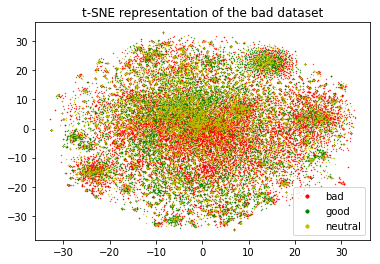

In [9]:
#plt.figure(figsize=(16,9))
size = 0.5
n_points = tsne_results.shape[0] #all
plt.scatter(tsne_results[ibad, 0][:n_points], tsne_results[ibad, 1][:n_points], marker='.', c='r', s=size, label='bad')
plt.scatter(tsne_results[igood, 0][:n_points], tsne_results[igood, 1][:n_points], marker='.', c='g', s=size, label='good')
plt.scatter(tsne_results[ineutral, 0][:n_points], tsne_results[ineutral, 1][:n_points], marker='.', c='y', s=size, label='neutral')
plt.title('t-SNE representation of the bad dataset')

lgnd = plt.legend(scatterpoints=1)
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]

plt.savefig("bad.png", bbox_inches='tight', dpi=300)

In [10]:
import numpy as np
np.savetxt('bad_tsne_results', tsne_results)
np.savetxt('bad_ibad_tsne_results', ibad)
np.savetxt('bad_igood_tsne_results', igood)
np.savetxt('bad_ineutral_tsne_results', ineutral)